In [19]:
import numpy as np
from keras.utils import np_utils
np.random.seed(10)
from keras.layers import Dropout

In [20]:
from keras.datasets import mnist
(x_train_image, y_train_label),\
(x_test_image, y_test_label) = mnist.load_data()

In [21]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test = x_test_image.reshape(10000,784).astype('float32')

In [22]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [23]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
model = Sequential() #建立模型

In [26]:
model.add(Dense(     #輸入層、隱藏層
    units = 1000,     #1000層隱藏層
    input_dim=784,
    kernel_initializer='normal',   #使用常態分佈的亂數，初始化weight(權重) bias(偏差)
    activation='relu'))  #定義激活函數為relu

In [27]:
model.add(Dropout(0.5))

In [28]:
model.add(Dense(
    units=10, #輸出層神經元數10
    kernel_initializer='normal',
    activation='softmax'#定義激活函數為softmax
))

In [29]:
print(model.summary()) #可以使用這個指令炸看模型摘要 param計算方式784*256+256=20096//256*10+10=2570

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
model.compile(loss='categorical_crossentropy',   #設定損失函數
             optimizer='adam',                   #設定訓練時最優化方法，使用adam可以更快收斂，提高準確率
             metrics=['accuracy'])               #設定評估模型的方式是accuracy準確率

In [31]:
#開始訓練
train_history = model.fit(     #使用model.fix進行訓練
    x=x_Train_normalize,        #輸入x=x_Train_nomalize(Features數字影像的特徵)
    y=y_Train_OneHot,          #輸入 y=y_Train_OneHot(label數字影像的真實值)
    validation_split=0.2,      #訓練前Keras會自東把資料分成 80%訊練資料 20%驗證資料
    epochs=10,                 #執行10次週期訓練
    batch_size=200,            #每一批次200筆資料
    verbose=2                  #顯示訓練過程
)

###60000筆  60000*0.8=48000作為訓練資料 12000作為驗證資料
###48000筆資料逕行訓練，分為每一批次200筆，所以大約240批次(48000/200=240)逕行訓練
###epoch 訓練完後會計算批次訓練週期的accuracy跟loss並記錄在train_history中

Epoch 1/10
240/240 - 4s - loss: 0.3584 - accuracy: 0.8926 - val_loss: 0.1602 - val_accuracy: 0.9554 - 4s/epoch - 15ms/step
Epoch 2/10
240/240 - 3s - loss: 0.1610 - accuracy: 0.9529 - val_loss: 0.1160 - val_accuracy: 0.9657 - 3s/epoch - 12ms/step
Epoch 3/10
240/240 - 3s - loss: 0.1148 - accuracy: 0.9668 - val_loss: 0.0950 - val_accuracy: 0.9713 - 3s/epoch - 12ms/step
Epoch 4/10
240/240 - 3s - loss: 0.0920 - accuracy: 0.9729 - val_loss: 0.0855 - val_accuracy: 0.9733 - 3s/epoch - 12ms/step
Epoch 5/10
240/240 - 3s - loss: 0.0750 - accuracy: 0.9774 - val_loss: 0.0781 - val_accuracy: 0.9761 - 3s/epoch - 14ms/step
Epoch 6/10
240/240 - 3s - loss: 0.0643 - accuracy: 0.9800 - val_loss: 0.0760 - val_accuracy: 0.9780 - 3s/epoch - 13ms/step
Epoch 7/10
240/240 - 3s - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0720 - val_accuracy: 0.9775 - 3s/epoch - 12ms/step
Epoch 8/10
240/240 - 3s - loss: 0.0487 - accuracy: 0.9847 - val_loss: 0.0713 - val_accuracy: 0.9791 - 3s/epoch - 12ms/step
Epoch 9/10
240/2

accuracy 訓練準確率 與 val_accuracy驗證準確率差距很小，代表已經改善overfitting了

In [32]:
#讀取train_history
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation): #匯入之前訓練產生的train_history/訓練資料的執行結果/驗證資料的執行結果
    plt.plot(train_history.history[train])              #訓練資料的執行結果畫線
    plt.plot(train_history.history[validation])         #驗證資料的執行結果
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

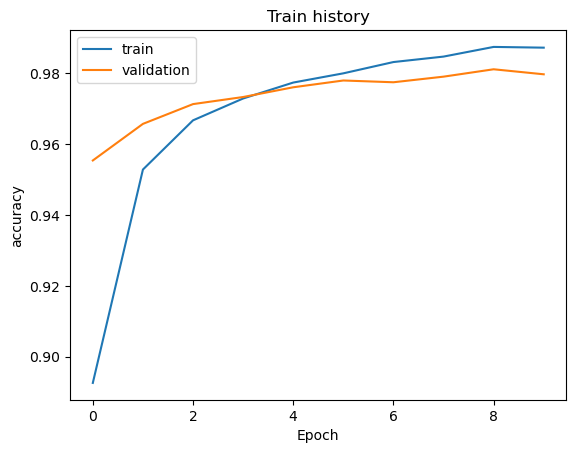

In [33]:
#呼叫執行結果
show_train_history(train_history,'accuracy','val_accuracy')

#為何「acc訓練的準確率」比「val_acc 驗證的準確率」高？
#這是因爲計算準確率的資料不同。
#•acc訓辣的準確率：以訓練的資料，計算準確率，因爲相同的資料已經訓練過了，又拿來計算準確率，所以準確率會比較高
#(就好像老師上課後，又使用上課的題目進行考試，準確率會比較高）。

#•val acc驗證的準確率：以驗證資料計算準確率，這此驗證資料之前訓練時，並末拿來訓練，所以計算的準確率會比較低。
#但是這樣計算出來的準確率比較客觀，比較符合眞實情況（就好像老師上課後，使用獨立的題庫進行考試，這樣準確率沒有那麼高，但是比較客觀）。
#如果「acc 訓練的準確率」一直增加，但是 「val acc 驗證的準確率」一直沒有增加，就可能是overftting 過度擬合的現象。
#從圖形可以看到，雖然「acc 訓練的準確率」比 「val acc驗證的準確率」高，雖然差異沒有很大，但仍有輕微 overftting 過度擬合的現象。

訓練的準確率 比 驗證的準確率高，overfitting更嚴重 
所以要藉由Dropout功能解決

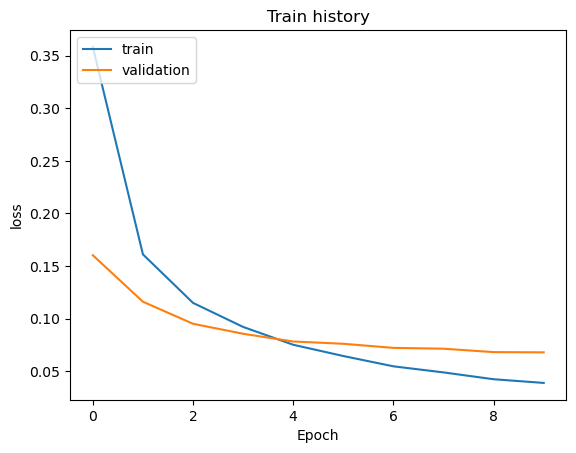

In [34]:
#loss誤差執行結果
show_train_history(train_history,'loss','val_loss')

In [35]:
#評估模型的準確率
scores = model.evaluate(x_Test_normalize,y_Test_OneHot)    #使用model.evaluate評估準確率
print()
print('accuracy=',scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0628 - accuracy: 0.9798

accuracy= 0.9797999858856201


In [51]:
#進行預測
prediction = model.predict(x_Test) #使用model.predict_classes進行預測
classes_x=np.argmax(prediction,axis=1)

313/313 [==============================] - 0s 1ms/step


In [66]:
classes_x

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [67]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): #數字影像,真實質,預測結果,開始的顯示資料index,要顯示的資料數
    fig = plt.gcf()            #圖形大小
    fig.set_size_inches(12,14) #圖形大小
    if num > 25 : num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)#建立subgraph子圖形5行5列
        ax.imshow(images[idx],cmap='binary')#劃出subgraph子圖形
        title = "label=" + str(labels[idx])#設定子圖形title
        if len(prediction)>0:             #如果有傳入預測結果
            title+=",predict="+str(prediction[idx]) #標題加上預測結果
            
        ax.set_title(title,fontsize=10)   #設定title大小
        ax.set_xticks([]);ax.set_yticks([]) #設定不顯示刻度
        idx+=1
    plt.show()

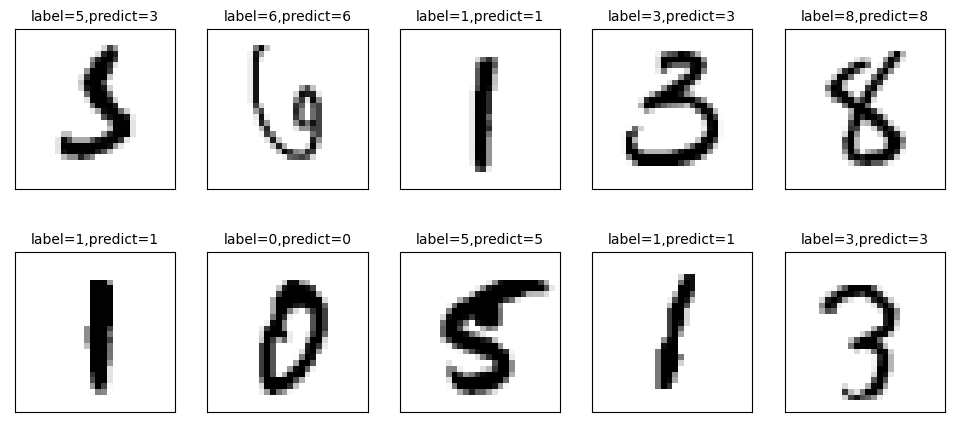

In [68]:
plot_images_labels_prediction(x_test_image,y_test_label,classes_x,idx=340)

In [70]:
#confusion matrix
import pandas as pd
pd.crosstab(y_test_label,classes_x,rownames=['label'],colnames=['predict'])
#使用pd.crosstab建立混淆矩陣,輸入以下參數(真實值/預測結果/行名稱是label/列名稱是predict)

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,2,0,2,1,2,0
1,0,1124,4,0,0,1,2,0,4,0
2,3,2,1015,2,1,0,2,4,3,0
3,0,0,9,990,0,1,0,2,2,6
4,0,1,3,1,959,0,4,2,0,12
5,5,1,0,19,1,844,10,1,8,3
6,5,3,3,1,2,3,940,0,1,0
7,1,7,11,6,0,0,0,997,0,6
8,4,1,8,8,4,3,3,3,936,4


上途中對角線是預測正確，我們發現:真實是1被正確預測為1的有1124筆。真實值5被正確預測為5只有852筆最低最容易混淆。
其他非對角線的數字，代表某一個標籤預測錯誤，真實值5但是預測是3共有19筆最高。代表模型5容易混淆成3。

In [72]:
#建立真實值與預測dataframe
df = pd.DataFrame({'label':y_test_label,'predict':classes_x})
df[:2]

,label,predict
0,7,7
1,2,2


In [74]:
#查詢真實值為5，但是預測為3
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3
4300,5,3


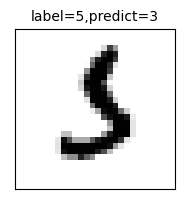

In [75]:
#查看第340筆資料
plot_images_labels_prediction(x_test_image,y_test_label,classes_x,idx=340,num=1)